# WeatherPy

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import key_dict
from pprint import pprint
import scipy.stats as stat
from citipy import citipy
import random
import json

weather_key = key_dict['owm']

# Output file
output_data_file = ".../output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Find lattitude and longitude for random cities
lat_lngs = []
cities = []

# Random lattitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# use exception to ensure that we do not get duplicate cities
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
 
    if city not in cities:
        cities.append(city)
        
len(cities)

628

In [ ]:
# Confirm list of cities pulled then comment out to take less space
# cities

### API Calls

In [21]:
# New list to contain 
responses_city = []
for city in cities:
    main_url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = f"{main_url}appid={weather_key}&q="
    try:
        city_data = requests.get(query_url + city).json()
        responses_city.append(city_data)
        print(f"Processing Record for city: {city}")

    except (KeyError):
        print("City information not available")

Processing Record for city: toowoomba
Processing Record for city: victor harbor
Processing Record for city: formosa do rio preto
Processing Record for city: kapaa
Processing Record for city: arman
Processing Record for city: sikasso
Processing Record for city: sumbe
Processing Record for city: shrigonda
Processing Record for city: torbay
Processing Record for city: tsihombe
Processing Record for city: pochutla
Processing Record for city: albany
Processing Record for city: port blair
Processing Record for city: ushuaia
Processing Record for city: urfa
Processing Record for city: san cristobal
Processing Record for city: vaini
Processing Record for city: kirundo
Processing Record for city: iqaluit
Processing Record for city: hermanus
Processing Record for city: saskylakh
Processing Record for city: valls
Processing Record for city: bluff
Processing Record for city: arawa
Processing Record for city: lebu
Processing Record for city: naze
Processing Record for city: upernavik
Processing Rec

Processing Record for city: sorkjosen
Processing Record for city: champerico
Processing Record for city: svetlogorsk
Processing Record for city: ciechocinek
Processing Record for city: katherine
Processing Record for city: igarka
Processing Record for city: puerto leguizamo
Processing Record for city: the valley
Processing Record for city: bambanglipuro
Processing Record for city: kodiak
Processing Record for city: dale
Processing Record for city: lagoa
Processing Record for city: katsuura
Processing Record for city: rawson
Processing Record for city: guerrero negro
Processing Record for city: zhezkazgan
Processing Record for city: komsomolskiy
Processing Record for city: yulara
Processing Record for city: rasuceni
Processing Record for city: khorramabad
Processing Record for city: lavrentiya
Processing Record for city: kanniyakumari
Processing Record for city: malayal
Processing Record for city: morgan city
Processing Record for city: kruisfontein
Processing Record for city: cayenne
P

Processing Record for city: uyutne
Processing Record for city: toliary
Processing Record for city: parauna
Processing Record for city: asyut
Processing Record for city: fenoarivo atsinanana
Processing Record for city: kavaratti
Processing Record for city: shiyan
Processing Record for city: sorong
Processing Record for city: pemangkat
Processing Record for city: vanino
Processing Record for city: cedar city
Processing Record for city: urucui
Processing Record for city: santa cruz
Processing Record for city: sao felix do xingu
Processing Record for city: kangaatsiaq
Processing Record for city: hadishahr
Processing Record for city: lapua
Processing Record for city: dubbo
Processing Record for city: valdivia
Processing Record for city: kununurra
Processing Record for city: port augusta
Processing Record for city: lazaro cardenas
Processing Record for city: aswan
Processing Record for city: brae
Processing Record for city: natal
Processing Record for city: ponta do sol
Processing Record for

In [ ]:
# Confirm json pull was successful then comment out to take less space. 
#responses_city

### Convert to DataFrame

In [48]:
# Create new lists to create dataframe with needed data
lat = []
lng = []
temp = []
hum = []
cloud = []
wind_speed = []
city_name = []
country_name = []
main_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{main_url}appid={weather_key}&q="

# Fill new lists

for city in cities:
    city_data = requests.get(query_url + city).json()

    try:
        city_name.append(city_data['name'])
        country_name.append(city_data['sys']['country'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp_max'])
        hum.append(city_data['main']['humidity'])
        cloud.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
    
    except KeyError:
        pass
        

In [56]:
# Create data frame with compiled data
city_data_df = pd.DataFrame({'City': city_name, 'Country': country_name, 'Lat': lat, 'Lng': lng, 'Max Temp': temp, 'Humidity %': hum, 
                         'Cloudiness': cloud, 'Wind Speed': wind_speed})
city_data_df.index.name = 'City_ID'
city_data_df

,City,Country,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed
City_ID,,,,,,,,
0,Toowoomba,AU,-27.5500,151.9667,294.15,83,40,4.63
1,Victor Harbor,AU,-35.5667,138.6167,292.59,73,35,2.75
2,Formosa do Rio Preto,BR,-11.0483,-45.1931,298.57,79,100,1.95
3,Kapaa,US,22.0752,-159.3190,293.15,83,90,8.75
4,Arman',RU,59.7000,150.1667,256.35,78,0,1.44
...,...,...,...,...,...,...,...,...
578,Sinnamary,GF,5.3833,-52.9500,299.72,78,42,4.00
579,Shitanjing,CN,39.2342,106.3439,270.00,26,0,4.84
580,Jiaocheng,CN,24.6774,116.1389,293.26,80,4,1.80


In [55]:
# Export data to csv
city_data_df.to_csv("../output_data/cities.csv", encoding="utf-8", header=True)

## Lattitude vs. Temperature Plot

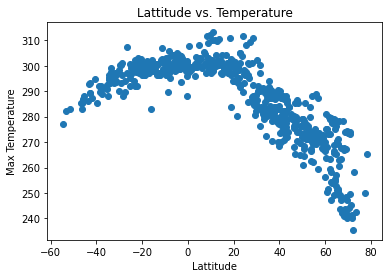

In [57]:
# Create scatter plot of results for Temperature
plt.scatter(lat, temp)
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature")
plt.title("Lattitude vs. Temperature")
plt.savefig("../output_data/Fig1.png")
plt.show()

The results from the data show that temperature is highest the closer to equator (0 Lattitude). At Lattitude 80 which is the furthest from the equator and closest to the top of the northern hemisphere we see the temperature dropping to the lowest kelvin amount.  

## Lattitude vs. Humidity Plot

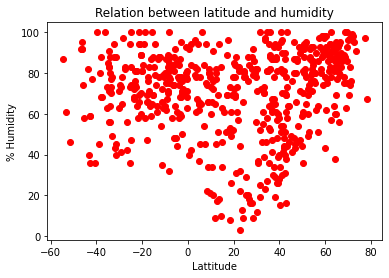

In [58]:
plt.scatter(lat, hum, facecolors='red')
plt.xlabel("Lattitude")
plt.ylabel ("% Humidity")
plt.title("Relation between latitude and humidity")
plt.savefig("../output_data/Fig2.png")
plt.show()

Based on the information compiled, we cannot say that the humidity is directly related to the latitude. We can see that humidity is mostly over 60% and becomes more humid as you move to higher latitudes. 

## Lattitude vs. Cloudiness Plot

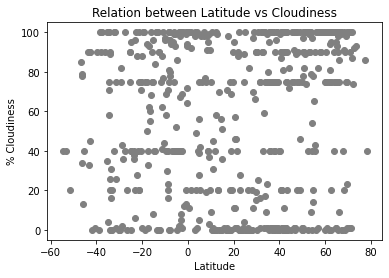

In [59]:
plt.scatter(lat,cloud, facecolors="gray")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Relation between Latitude vs Cloudiness")
plt.savefig("../output_data/Fig3.png")
plt.show()

When reviewing the cloudiness per city we can see that the extremes (higher and lower temperatures) are more likely to have a higher density of clouds. 
Surprisingly that is not correlated to the percentage of humidity in the cities as compared by the previous plot. 

## Lattitude vs. Windspeed Plot

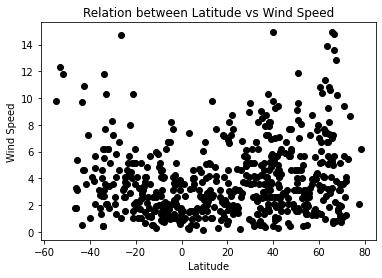

In [60]:
plt.scatter(lat,wind_speed, facecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Relation between Latitude vs Wind Speed")
plt.savefig("../output_data/Fig4.png")
plt.show()

In [61]:
North = city_data_df['Lat'] > 0
cities_north = city_data_df [North]
cities_north.head()

,City,Country,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed
City_ID,,,,,,,,
3,Kapaa,US,22.0752,-159.3190,293.15,83,90,8.75
4,Arman',RU,59.7000,150.1667,256.35,78,0,1.44
5,Sikasso,ML,10.9167,-7.0000,313.13,20,31,1.59
7,Shrīgonda,IN,18.6167,74.6833,302.62,26,69,2.05
8,Torbay,CA,47.6666,-52.7314,270.37,86,75,7.72


In [62]:
South = city_data_df['Lat'] < 0
cities_south = city_data_df [South]
cities_south.head()

,City,Country,Lat,Lng,Max Temp,Humidity %,Cloudiness,Wind Speed
City_ID,,,,,,,,
0,Toowoomba,AU,-27.5500,151.9667,294.15,83,40,4.63
1,Victor Harbor,AU,-35.5667,138.6167,292.59,73,35,2.75
2,Formosa do Rio Preto,BR,-11.0483,-45.1931,298.57,79,100,1.95
6,Sumbe,AO,-11.2061,13.8437,301.58,72,88,3.00
12,Ushuaia,AR,-54.8000,-68.3000,277.15,87,40,9.77


#### Northern Hemisphere - Temperature vs. Lattitude Regression

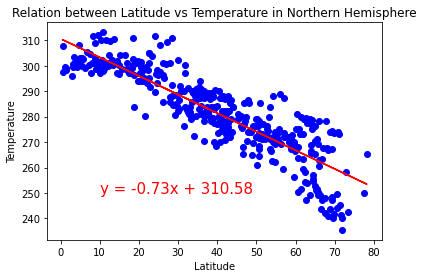

In [68]:
lat_north = cities_north['Lat']
temp_north = cities_north['Max Temp']

plt.scatter(lat_north, temp_north, facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Relation between Latitude vs Temperature in Northern Hemisphere")
plt.savefig("../output_data/Fig5.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, temp_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10, 250), fontsize=15, color="red")
plt.plot(lat_north, regress_values, "r-")
plt.show()

#### Southern Hemisphere - Temperature vs. Lattitude Regression

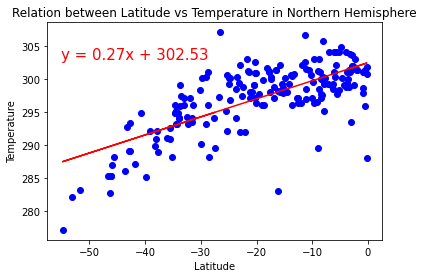

In [74]:
lat_south = cities_south['Lat']
temp_south = cities_south['Max Temp']

plt.scatter(lat_south, temp_south, facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Relation between Latitude vs Temperature in Northern Hemisphere")
plt.savefig("../output_data/Fig6.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, temp_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55, 303), fontsize=15, color="red")
plt.plot(lat_south, regress_values, "r-")
plt.show()

The plots for the north and the south hemisphere show that moving further north from the equator results in colder temperatures and closer to the equator it gets hotter for the southern hemisphere data; none of this information is necessarily suprising.  


#### Northern Hemisphere - Humidity vs. Lattitude Regression

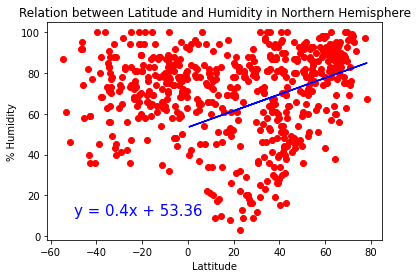

In [79]:
hum_north = cities_north['Humidity %']

plt.scatter(lat, hum, facecolors='red')
plt.xlabel("Lattitude")
plt.ylabel ("% Humidity")
plt.title("Relation between Latitude and Humidity in Northern Hemisphere")
plt.savefig("../output_data/Fig6.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, hum_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50, 10), fontsize=15, color="blue")
plt.plot(lat_north, regress_values, "b-")
plt.show()

#### Southern Hemisphere - Humidity vs. Lattitude Regression

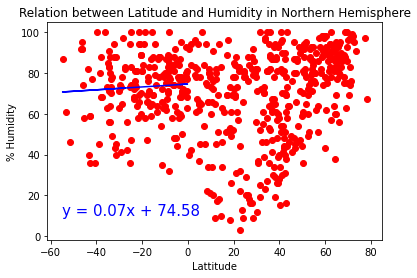

In [81]:
hum_south = cities_south['Humidity %']

plt.scatter(lat, hum, facecolors='red')
plt.xlabel("Lattitude")
plt.ylabel ("% Humidity")
plt.title("Relation between Latitude and Humidity in Northern Hemisphere")
plt.savefig("../output_data/Fig7.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, hum_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55, 10), fontsize=15, color="blue")
plt.plot(lat_south, regress_values, "b-")
plt.show()

#### Northern Hemisphere - Cloudiness vs. Lattitude Regression

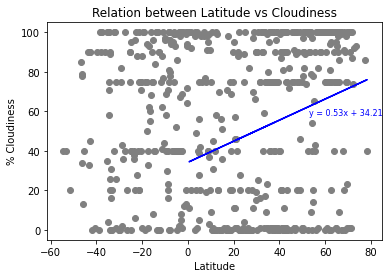

In [90]:
cloud_north = cities_north['Cloudiness']

plt.scatter(lat,cloud, facecolors="gray")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Relation between Latitude vs Cloudiness")
plt.savefig("../output_data/Fig8.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloud_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(53, 58), fontsize=8, color="blue")
plt.plot(lat_north, regress_values, "b-")
plt.show()

#### Southern Hemisphere - Cloudiness vs. Lattitude Regression

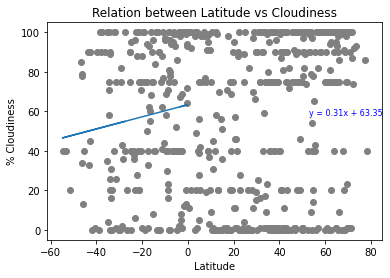

In [102]:
cloud_south = cities_south['Cloudiness']

plt.scatter(lat, cloud, facecolors="gray")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Relation between Latitude vs Cloudiness")
plt.savefig("../output_data/Fig9.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, cloud_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(53, 58), fontsize=8, color="blue")
plt.plot(lat_south, regress_values, )
plt.show()

#### Northern Hemisphere - Wind Speed vs. Lattitude Linear Regression

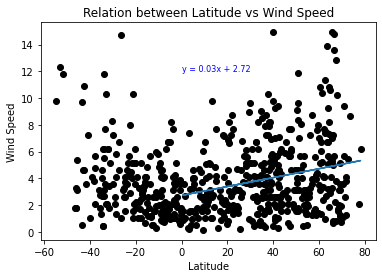

In [104]:
wind_speed_north = cities_north['Wind Speed']

plt.scatter(lat, wind_speed, facecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Relation between Latitude vs Wind Speed")
plt.savefig("../output_data/Fig10.png")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, wind_speed_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0, 12), fontsize=8, color="blue")
plt.plot(lat_north, regress_values)
plt.show()

#### Southern Hemisphere - Wind Speed vs. Lattitude Linear Regression